In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import csv

In [43]:
results = r'./results.csv'

with open(results, 'r') as infile:
    reader = csv.reader(infile)
    rows = [row for row in reader if any(field.strip() for field in row)]  # Filter out empty rows

# Write the non-empty rows back to the same file
with open(results, 'w', newline='') as outfile:
    writer = csv.writer(outfile)
    writer.writerows(rows)

df = pd.read_csv(results)
df
df['Log2ArraySize'] = np.log2(df['ArraySize'])
df

,Threads,ArraySize,Time,Log2ArraySize
0,1,1048576,0.110735,20.0
1,1,1048576,0.092046,20.0
2,1,1048576,0.091949,20.0
3,1,2097152,0.197478,21.0
4,1,2097152,0.195195,21.0
...,...,...,...,...
390,12,536870912,31.420821,29.0
391,12,536870912,25.947822,29.0
392,12,1073741824,51.430445,30.0
393,12,1073741824,43.954825,30.0


In [44]:
grouped = df.groupby(['Threads', 'ArraySize']).agg({
    'Time': ['mean', 'std']
}).reset_index()
grouped['Log2MatrixSize'] = np.log2(grouped['ArraySize'])
grouped['Log2MatrixSize'] = grouped['Log2MatrixSize'].astype(int)
grouped.columns = ['Threads', 'ArraySize', 'MeanTime', 'StdTime', 'Log2MatrixSize']
#grouped = grouped[grouped['Log2MatrixSize'] > 4]
grouped

,Threads,ArraySize,MeanTime,StdTime,Log2MatrixSize
0,1,1048576,0.098243,0.010818,20
1,1,2097152,0.195381,0.002010,21
2,1,4194304,0.408443,0.007398,22
3,1,8388608,0.850686,0.004253,23
4,1,16777216,1.792427,0.023033,24
...,...,...,...,...,...
127,12,67108864,2.340156,0.271296,26
128,12,134217728,5.960157,0.785156,27
129,12,268435456,10.641699,2.006145,28
130,12,536870912,25.707942,5.836518,29


In [12]:
#grouped.to_csv('table.csv')

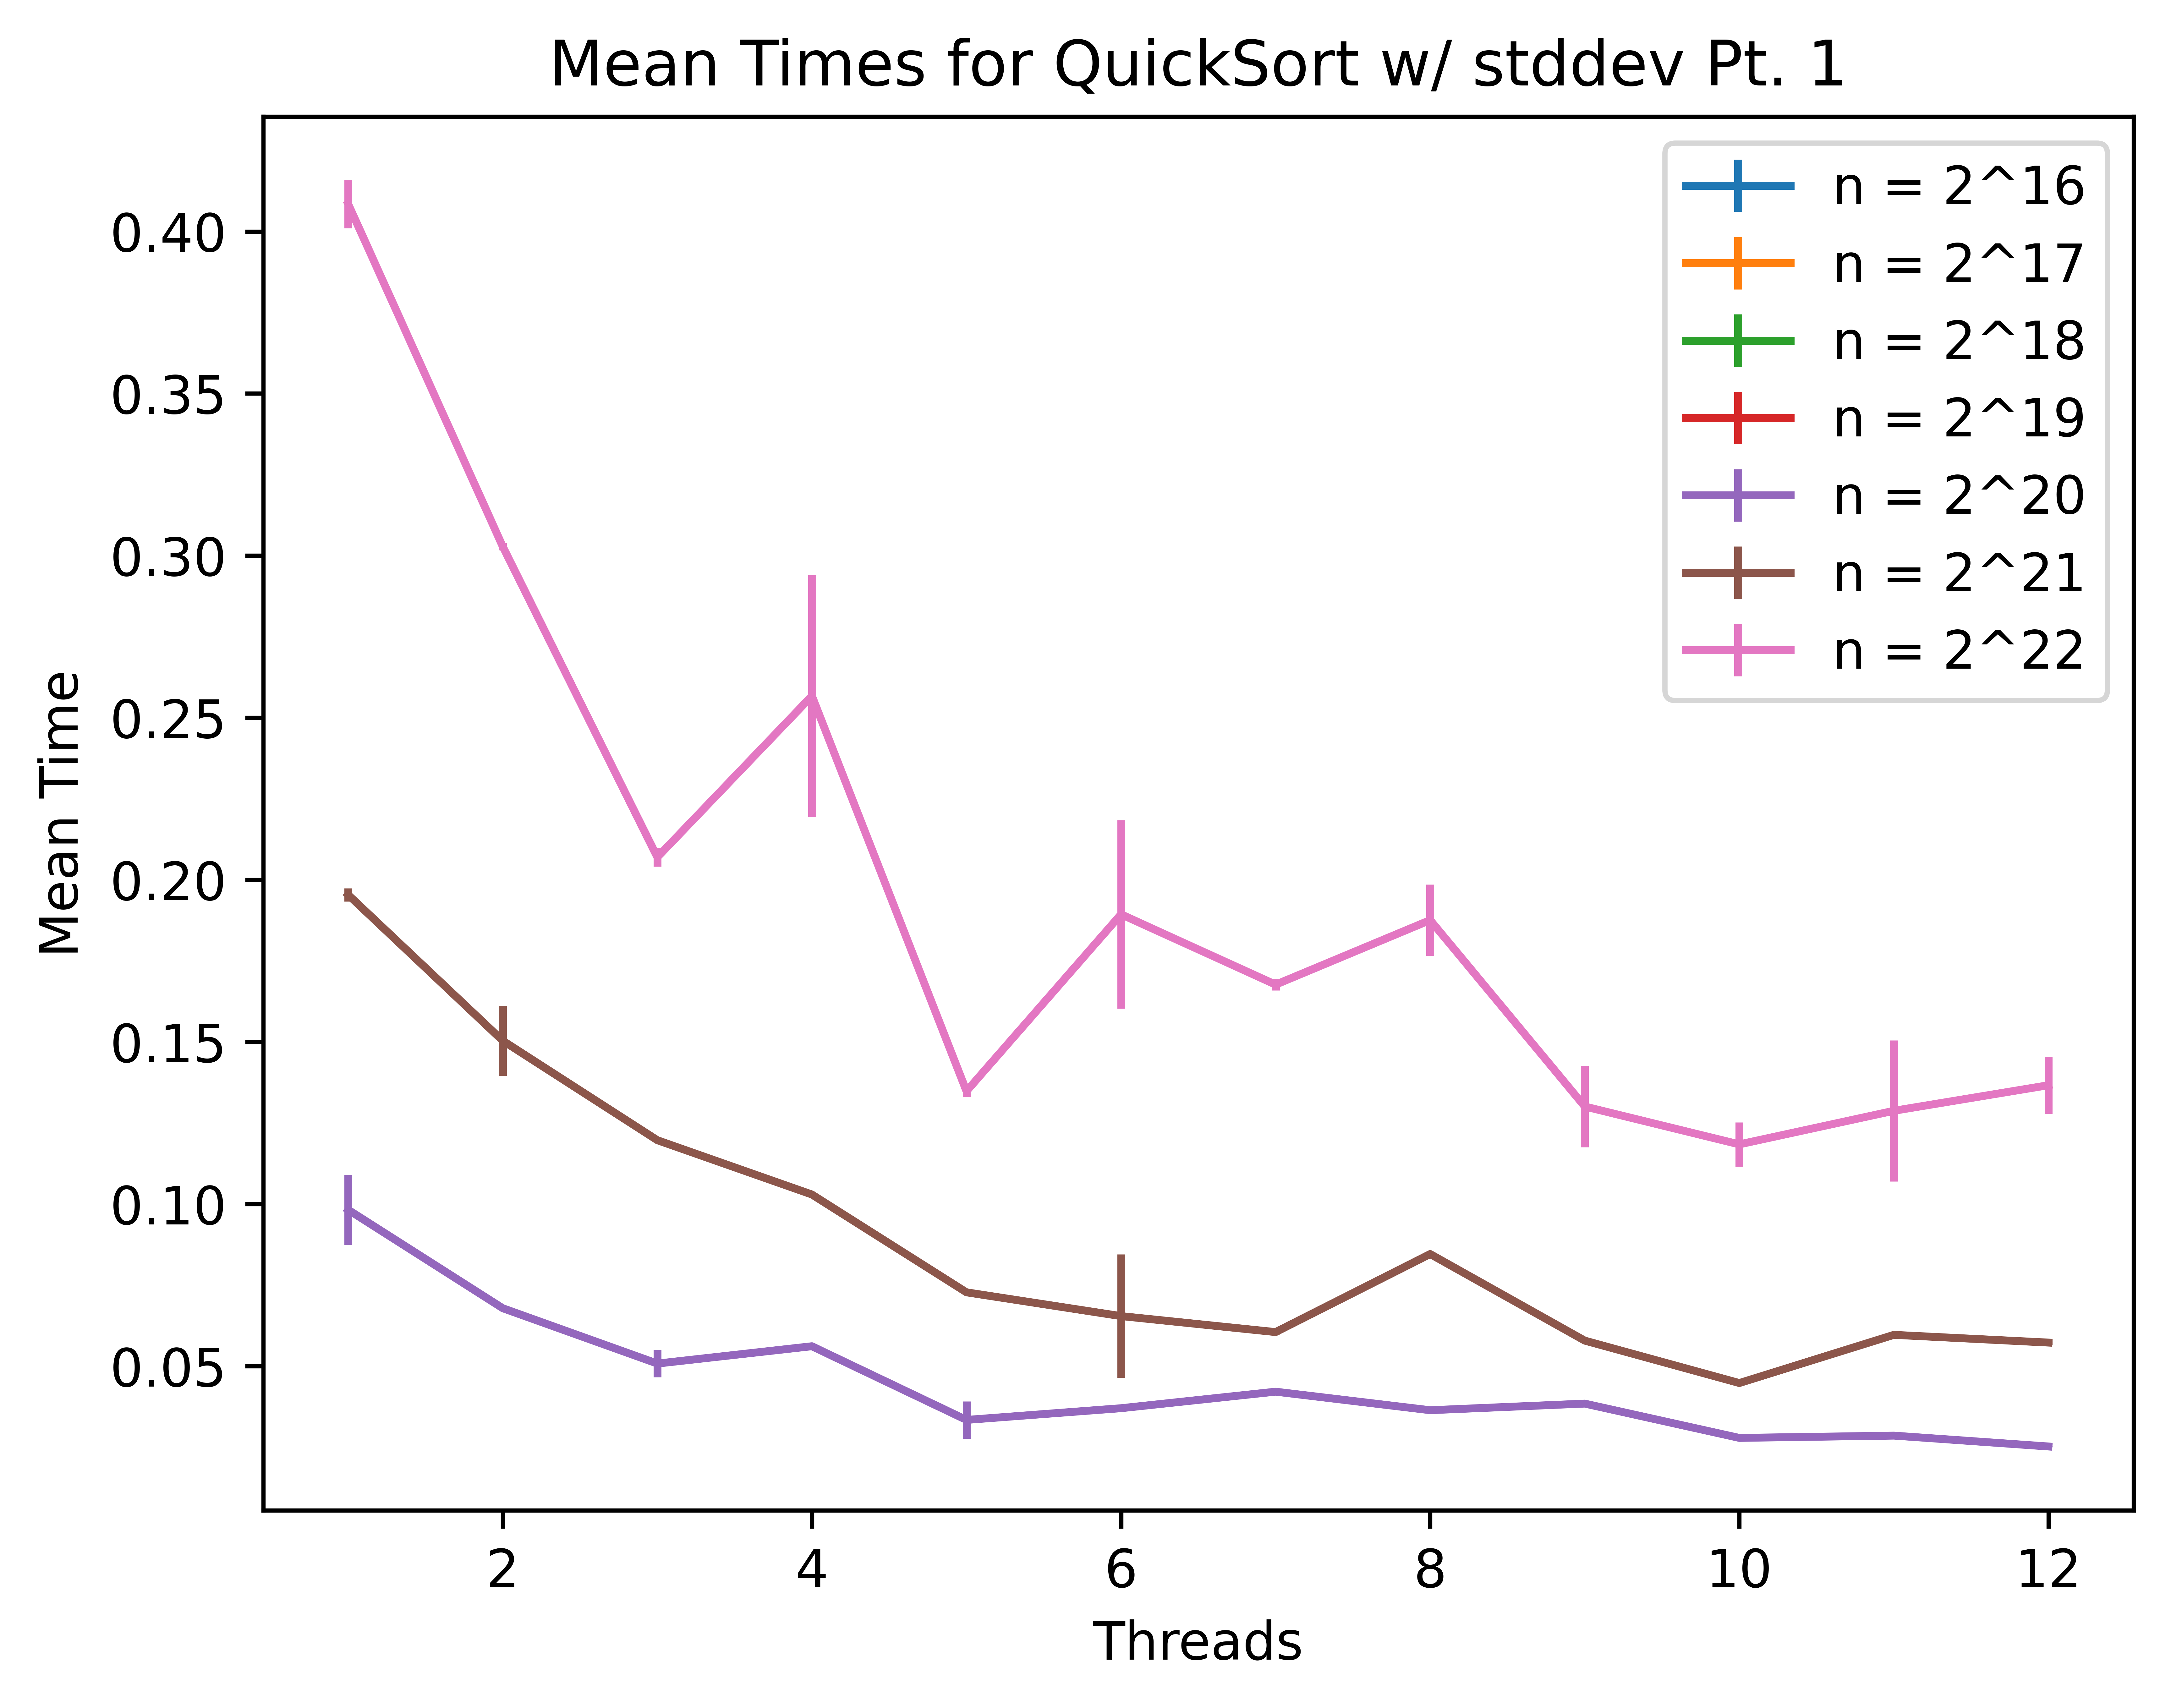

In [45]:
least = 16
most = 30
mid = (least + most) // 2
plt.figure(dpi=1200)

for i in range(least, mid):
    temp = grouped[grouped['Log2MatrixSize'] == i]
    #print(temp)
    plt.errorbar(temp['Threads'], temp['MeanTime'], yerr=temp['StdTime'], label=f"n = 2^{i}")
    plt.xlabel("Threads")
    plt.ylabel("Mean Time")

plt.title(f"Mean Times for QuickSort w/ stddev Pt. 1")
plt.legend(loc='upper right')
plt.savefig('results1.png')
plt.show()

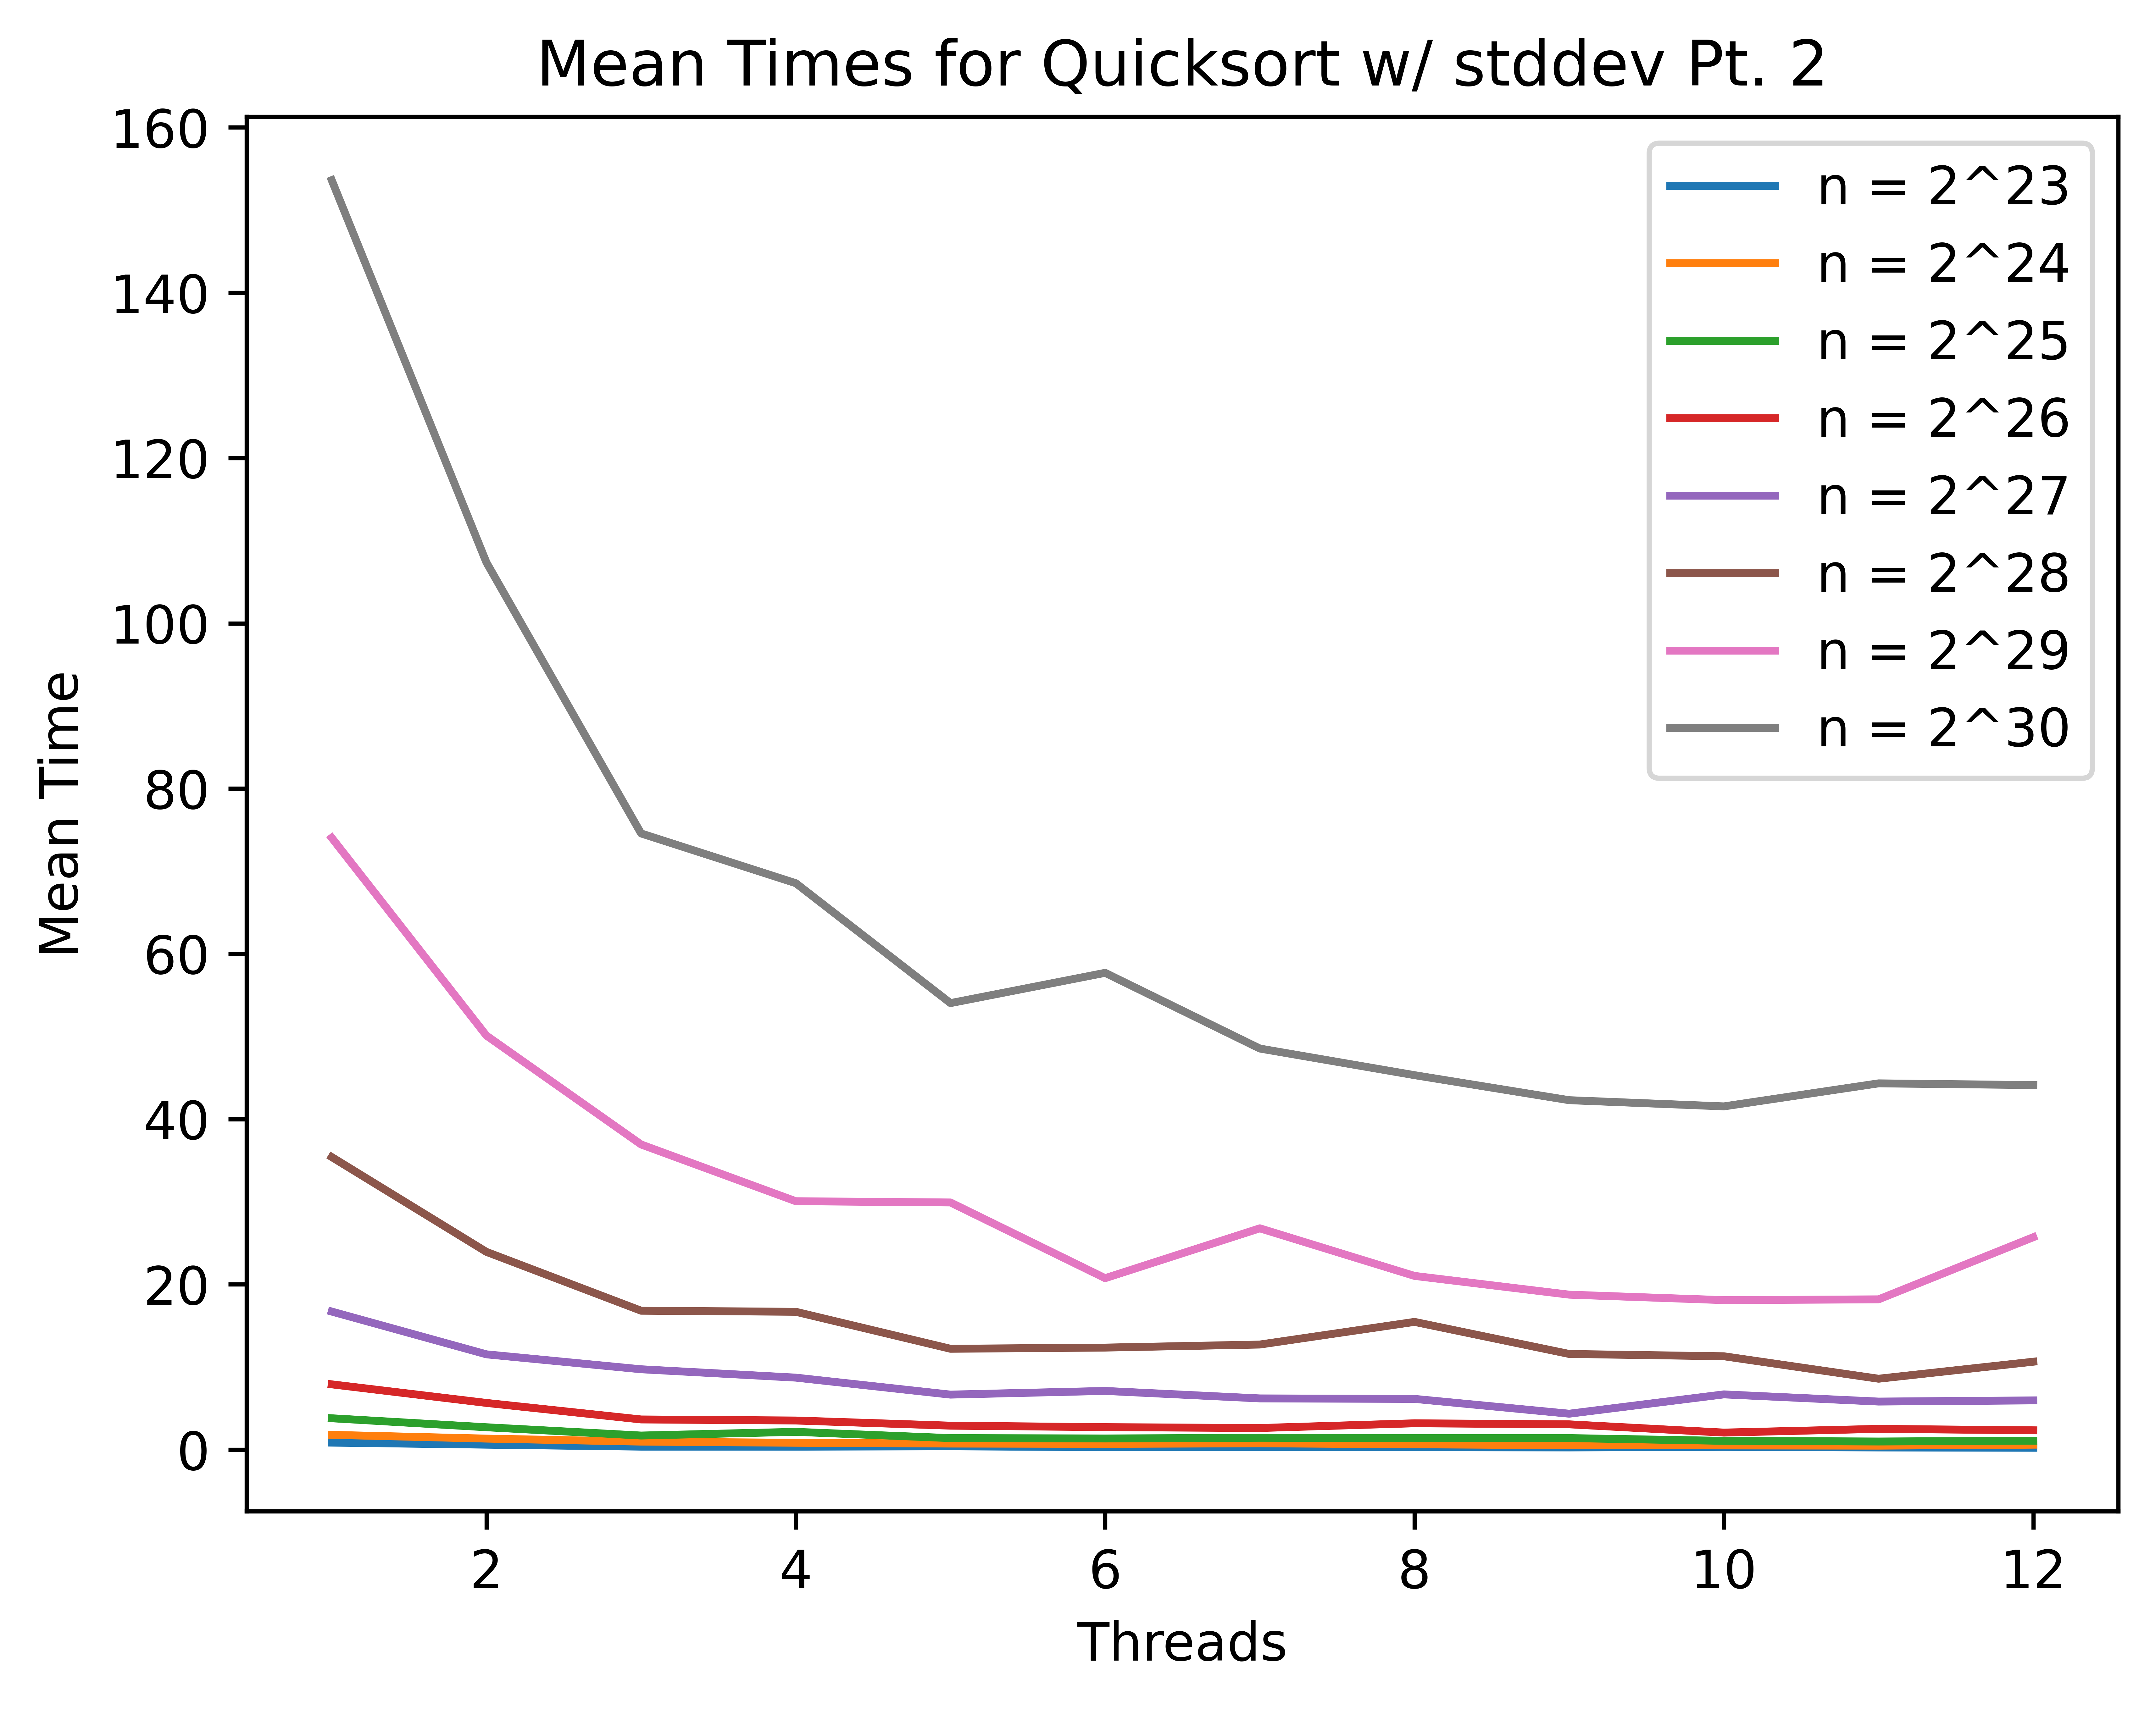

In [46]:
plt.figure(dpi=1200)

for i in range(mid, most+1):
    temp = grouped[grouped['Log2MatrixSize'] == i]
    #print(temp)
    plt.errorbar(temp['Threads'], temp['MeanTime'], label=f"n = 2^{i}")
    plt.xlabel("Threads")
    plt.ylabel("Mean Time")
plt.title(f"Mean Times for Quicksort w/ stddev Pt. 2")
plt.legend(loc='upper right')
plt.savefig('results2.png')
plt.show()